In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType, ArrayType

In [2]:
spark = SparkSession.builder.appName('CreditCard').getOrCreate()

23/10/12 15:25:20 WARN Utils: Your hostname, Nahids-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.155 instead (on interface en0)
23/10/12 15:25:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/10/12 15:25:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
#CREATING BRANCH PANDAS DATAFRAME
#read branch json file
import pandas as pd
from pyspark.sql.types import DateType
branch = spark.read.json('cdw_sapp_branch.json')
branch_pandas = branch.toPandas()

branch_pandas

,BRANCH_CITY,BRANCH_CODE,BRANCH_NAME,BRANCH_PHONE,BRANCH_STATE,BRANCH_STREET,BRANCH_ZIP,LAST_UPDATED
0,Lakeville,1,Example Bank,1234565276,MN,Bridle Court,55044,2018-04-18T16:51:47.000-04:00
1,Huntley,2,Example Bank,1234618993,IL,Washington Street,60142,2018-04-18T16:51:47.000-04:00
2,SouthRichmondHill,3,Example Bank,1234985926,NY,Warren Street,11419,2018-04-18T16:51:47.000-04:00
3,Middleburg,4,Example Bank,1234663064,FL,Cleveland Street,32068,2018-04-18T16:51:47.000-04:00
4,KingOfPrussia,5,Example Bank,1234849701,PA,14th Street,19406,2018-04-18T16:51:47.000-04:00
...,...,...,...,...,...,...,...,...
110,Baldwin,178,Example Bank,1234612707,NY,8th Street West,11510,2018-04-18T16:51:47.000-04:00
111,NewHaven,180,Example Bank,1234347181,CT,Meadow Street,6511,2018-04-18T16:51:47.000-04:00
112,Quincy,188,Example Bank,1234259065,MA,Lincoln Avenue,2169,2018-04-18T16:51:47.000-04:00
113,Lititz,192,Example Bank,1234937904,PA,Glenwood Drive,17543,2018-04-18T16:51:47.000-04:00


In [8]:
import pymysql


In [9]:
#CREATING CREDIT DATA FRAME
#read credit json file
credit = spark.read.json("cdw_sapp_credit.json")
#create temp table to query credit dataframe
#credit.createTempView("credit_table")
credit_pandas = credit.toPandas()
credit_pandas

,BRANCH_CODE,CREDIT_CARD_NO,CUST_SSN,DAY,MONTH,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_VALUE,YEAR
0,114,4210653349028689,123459988,14,2,1,Education,78.90,2018
1,35,4210653349028689,123459988,20,3,2,Entertainment,14.24,2018
2,160,4210653349028689,123459988,8,7,3,Grocery,56.70,2018
3,114,4210653349028689,123459988,19,4,4,Entertainment,59.73,2018
4,93,4210653349028689,123459988,10,10,5,Gas,3.59,2018
...,...,...,...,...,...,...,...,...,...
46689,49,4210653344660822,123451007,12,9,46690,Gas,66.20,2018
46690,168,4210653344660822,123451007,5,2,46691,Grocery,100.13,2018
46691,104,4210653344660822,123451007,16,12,46692,Test,35.83,2018
46692,32,4210653344660822,123451007,15,1,46693,Entertainment,90.99,2018


In [10]:
custmer = spark.read.load("cdw_sapp_custmer.json", format="json", header = True,inferSchema = True)
custmer_pandas = custmer.toPandas()
custmer_pandas

,APT_NO,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,STREET_NAME
0,656,4210653310061055,Natchez,United States,AHooper@example.com,1237818,MS,39120,Alec,Hooper,2018-04-21T12:49:02.000-04:00,Wm,123456100,Main Street North
1,829,4210653310102868,Wethersfield,United States,EHolman@example.com,1238933,CT,06109,Etta,Holman,2018-04-21T12:49:02.000-04:00,Brendan,123453023,Redwood Drive
2,683,4210653310116272,Huntley,United States,WDunham@example.com,1243018,IL,60142,Wilber,Dunham,2018-04-21T12:49:02.000-04:00,Ezequiel,123454487,12th Street East
3,253,4210653310195948,NewBerlin,United States,EHardy@example.com,1243215,WI,53151,Eugenio,Hardy,2018-04-21T12:49:02.000-04:00,Trina,123459758,Country Club Road
4,301,4210653310356919,ElPaso,United States,WAyers@example.com,1242074,TX,79930,Wilfred,Ayers,2018-04-21T12:49:02.000-04:00,May,123454431,Madison Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,882,4210653399559239,SiouxCity,United States,FCastle@example.com,1238344,IA,51106,Freida,Castle,2018-04-21T12:49:02.000-04:00,Jonah,123451589,Main Street South
948,470,4210653399650358,Summerville,United States,FBlock@example.com,1240420,SC,29483,Fern,Block,2018-04-21T12:49:02.000-04:00,Aron,123457088,Glenwood Avenue
949,405,4210653399732638,Duluth,United States,DPruitt@example.com,1236149,GA,30096,Dylan,Pruitt,2018-04-21T12:49:02.000-04:00,Lucas,123453259,Country Lane
950,15,4210653399859149,Rowlett,United States,EBeatty@example.com,1236886,TX,75088,Emery,Beatty,2018-04-21T12:49:02.000-04:00,Susanna,123454047,8th Street


In [11]:
#CREATING CUSTMER PANDAS DATAFRAME
#Read the custmer json file into a dataframe
custmer = spark.read.load("cdw_sapp_custmer.json", format="json", header = True,inferSchema = True)

#Create a temp view of custmer
custmer.createTempView("custmer_table")

#create dataframe by querying custmer table with lower middle name
middle_name = spark.sql("select lower(middle_name) as middle_name from custmer_table")

#create full street address dataframe
full_address = spark.sql("SELECT CONCAT(apt_no, ', ', street_name) as full_street_address FROM custmer_table")

#convert full address dataframe to pandas dataframe
full_address = full_address.select("*").toPandas()

#convert middle name dataframe into pandas dataframe
middle_name = middle_name.select("*").toPandas()

#create custmer phone dataframe
spark.sql("SELECT CONCAT('(',substr(cust_phone,1,3),')',substr(cust_phone,4,3),'-',substr(cust_phone,7,4)) as updated_phone from custmer_table")

#convert custmer dataframe into pandas dataframe 
new_custmer = custmer.select("*").toPandas()

#Concat the two new pandas dataframes into one
updated_custmer = pd.concat([new_custmer, middle_name, full_address], axis =1)

#print updated customer table 
updated_custmer





,APT_NO,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,STREET_NAME,middle_name,full_street_address
0,656,4210653310061055,Natchez,United States,AHooper@example.com,1237818,MS,39120,Alec,Hooper,2018-04-21T12:49:02.000-04:00,Wm,123456100,Main Street North,wm,"656, Main Street North"
1,829,4210653310102868,Wethersfield,United States,EHolman@example.com,1238933,CT,06109,Etta,Holman,2018-04-21T12:49:02.000-04:00,Brendan,123453023,Redwood Drive,brendan,"829, Redwood Drive"
2,683,4210653310116272,Huntley,United States,WDunham@example.com,1243018,IL,60142,Wilber,Dunham,2018-04-21T12:49:02.000-04:00,Ezequiel,123454487,12th Street East,ezequiel,"683, 12th Street East"
3,253,4210653310195948,NewBerlin,United States,EHardy@example.com,1243215,WI,53151,Eugenio,Hardy,2018-04-21T12:49:02.000-04:00,Trina,123459758,Country Club Road,trina,"253, Country Club Road"
4,301,4210653310356919,ElPaso,United States,WAyers@example.com,1242074,TX,79930,Wilfred,Ayers,2018-04-21T12:49:02.000-04:00,May,123454431,Madison Street,may,"301, Madison Street"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,882,4210653399559239,SiouxCity,United States,FCastle@example.com,1238344,IA,51106,Freida,Castle,2018-04-21T12:49:02.000-04:00,Jonah,123451589,Main Street South,jonah,"882, Main Street South"
948,470,4210653399650358,Summerville,United States,FBlock@example.com,1240420,SC,29483,Fern,Block,2018-04-21T12:49:02.000-04:00,Aron,123457088,Glenwood Avenue,aron,"470, Glenwood Avenue"
949,405,4210653399732638,Duluth,United States,DPruitt@example.com,1236149,GA,30096,Dylan,Pruitt,2018-04-21T12:49:02.000-04:00,Lucas,123453259,Country Lane,lucas,"405, Country Lane"
950,15,4210653399859149,Rowlett,United States,EBeatty@example.com,1236886,TX,75088,Emery,Beatty,2018-04-21T12:49:02.000-04:00,Susanna,123454047,8th Street,susanna,"15, 8th Street"


In [24]:
#Write branch dataframe into HeidiSQL
import os
db_user = os.environ.get('DB_USER')
db_password= os.environ.get('DB_PASS')
branch.write.format("jdbc") \
  .option("driver","com.mysql.cj.jdbc.Driver") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "creditcard_capstone.CDW_SAPP_BRANCH") \
  .option("user", "root") \
  .option("password", "password" ) \
  .save()

Py4JJavaError: An error occurred while calling o192.save.
: java.lang.ClassNotFoundException: com.mysql.cj.jdbc.Driver
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:418)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:351)
	at org.apache.spark.sql.execution.datasources.jdbc.DriverRegistry$.register(DriverRegistry.scala:46)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.$anonfun$driverClass$1(JDBCOptions.scala:101)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.$anonfun$driverClass$1$adapted(JDBCOptions.scala:101)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.sql.execution.datasources.jdbc.JDBCOptions.<init>(JDBCOptions.scala:101)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcOptionsInWrite.<init>(JDBCOptions.scala:229)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcOptionsInWrite.<init>(JDBCOptions.scala:233)
	at org.apache.spark.sql.execution.datasources.jdbc.JdbcRelationProvider.createRelation(JdbcRelationProvider.scala:47)
	at org.apache.spark.sql.execution.datasources.SaveIntoDataSourceCommand.run(SaveIntoDataSourceCommand.scala:47)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:75)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:73)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.executeCollect(commands.scala:84)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:584)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:176)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:584)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:560)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:116)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:860)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:390)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:363)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:247)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)


23/04/09 10:09:01 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 901365 ms exceeds timeout 120000 ms
23/04/09 10:09:01 WARN SparkContext: Killing executors is not supported by current scheduler.
23/04/09 10:26:20 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:103)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:87)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:643)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1057)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:238)
	at sc

In [ ]:
#Write credit dataframe into HeidiSQL
import os 
db_user = os.environ.get('DB_USER')
db_password= os.environ.get('DB_PASS')

credit.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "creditcard_capstone.CDW_SAPP_CREDIT_CARD") \
  .option("user", db_user) \
  .option("password", db_password) \
  .save()

In [7]:
#Write custmer dataframe into HeidiSQL

import os 
db_user = os.environ.get('DB_USER')
db_password= os.environ.get('DB_PASS')

custmer.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "creditcard_capstone.CDW_SAPP_CUSTOMER") \
  .option("user", db_user) \
  .option("password", db_password) \
  .save()

In [8]:
#2.1 1) Used to display the transactions made by customers living in a given zip code for a given month and year.
#Order by day in descending order.

zipcode = 39120 
month = 2
year = 2018

    
spark.sql("SELECT * FROM credit_table crt INNER JOIN custmer_table ct on crt.CUST_SSN = ct.SSN \
          WHERE (cust_zip = {0} and month={1} and year={2})".format(zipcode, month, year)).show()

AnalysisException: Table or view not found: credit_table; line 1 pos 14;
'Project [*]
+- 'Filter ((('cust_zip = 39120) AND ('month = 2)) AND ('year = 2018))
   +- 'Join Inner, ('crt.CUST_SSN = 'ct.SSN)
      :- 'SubqueryAlias crt
      :  +- 'UnresolvedRelation [credit_table], [], false
      +- 'SubqueryAlias ct
         +- 'UnresolvedRelation [custmer_table], [], false


In [9]:
#2.1 Display the transactions made by customers living in a given zip code for a given month and year.
#Order by day in descending order.
#from pyspark.sql.functions import col, asc,desc
def transactions(year, month, zipcode):
    df = credit.join(custmer, credit.CUST_SSN == custmer.SSN,  'outer')
    df.filter( (df['year'] == year) & (df['month'] == month) & (df['CUST_ZIP'] == zipcode)).sort('day', ascending= False).show(10) 

transactions(2018, 8, 17201)

+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+------+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+--------------+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|APT_NO|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|          CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN|   STREET_NAME|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+------+----------------+------------+-------------+--------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+--------------+
|        166|4210653344660822|123451007| 28|    8|         46671|             Gas|             66.2|2018|   762|4210653344660822|Chamber

In [12]:
#Req 2.1 2) Display the number and total values of transactions for a given type.

#Used credit pyspark dataframe and filtered based on transaction type. To get the total values, used the group by and sum method.
from pyspark.sql.functions import sum
def total_transactions(type):
    print(credit.filter(credit['transaction_type'] == type).count())
    credit.filter(credit['transaction_type'] == type).groupBy().sum('transaction_value').show()
    
total_transactions('Gas')


6605
+----------------------+
|sum(transaction_value)|
+----------------------+
|    336059.26000000024|
+----------------------+



In [11]:
#Req 2.1 3) Display the total number and total values of transactions for branches in a given state.

def branch_transactions(state): 
        df2 = credit.join(branch, credit.BRANCH_CODE == branch.BRANCH_CODE,  'outer')
        #below prints the total transactions 
        print(df2.filter(df2['BRANCH_STATE'] == state).count())
        #below prints the total value of all the transactions
        df2.filter(df2['BRANCH_STATE'] == state).groupBy().sum('transaction_value').show()

branch_transactions('NJ')

2079


+----------------------+
|sum(transaction_value)|
+----------------------+
|    105667.73000000003|
+----------------------+



In [12]:
#Req 2.2 1)Used to check the existing account details of a customer.

def account_details(SSN):
    print(custmer.filter(custmer['SSN'] == SSN).show())

account_details(123456100)

+------+----------------+---------+-------------+-------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+
|APT_NO|  CREDIT_CARD_NO|CUST_CITY| CUST_COUNTRY|         CUST_EMAIL|CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN|      STREET_NAME|
+------+----------------+---------+-------------+-------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+
|   656|4210653310061055|  Natchez|United States|AHooper@example.com|   1237818|        MS|   39120|      Alec|   Hooper|2018-04-21T12:49:...|         Wm|123456100|Main Street North|
+------+----------------+---------+-------------+-------------------+----------+----------+--------+----------+---------+--------------------+-----------+---------+-----------------+

None


In [13]:
#Req 2.2 2) Used to modify the existing account details of a customer.
def modify_account(SSN):
    print(updated_custmer.loc[updated_custmer['SSN'] == SSN])

modify_account(123456100)

  APT_NO    CREDIT_CARD_NO CUST_CITY   CUST_COUNTRY           CUST_EMAIL  \
0    656  4210653310061055   Natchez  United States  AHooper@example.com   

   CUST_PHONE CUST_STATE CUST_ZIP FIRST_NAME LAST_NAME  \
0     1237818         MS    39120       Alec    Hooper   

                    LAST_UPDATED MIDDLE_NAME        SSN        STREET_NAME  \
0  2018-04-21T12:49:02.000-04:00          Wm  123456100  Main Street North   

  middle_name     full_street_address  
0          wm  656, Main Street North  


In [13]:
#Req 2.2 3) Generate a monthly bill for a credit card number for a given month and year.
def monthly_bill(credit_card_no, month, year):
    bill = credit.filter((credit['credit_card_no']== credit_card_no) & (credit['month']== month) & (credit['year']==year )).toPandas()
    print(bill['TRANSACTION_VALUE'].sum())
monthly_bill(4210653342242023, 2, 2018)

397.68


23/10/12 18:58:01 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 372312 ms exceeds timeout 120000 ms
23/10/12 18:58:01 WARN SparkContext: Killing executors is not supported by current scheduler.
23/10/12 18:58:05 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.B

In [17]:
#Req 3.1) Find and plot which transaction type has a high rate of transactions.

import numpy as np 
import matplotlib.pyplot as plt

#Make a list of all the unqiue transactions 
list_of_transactions = credit.select('transaction_type').distinct().rdd.map(lambda r: r[0]).collect()

#Find the total number of rows of dataframe 
total_transactions = credit.count()

#Find the percentage rate of each transaction type
perc_education = (credit.filter(credit['transaction_type'] == 'Education').count()) / total_transactions
perc_gas = (credit.filter(credit['transaction_type'] == 'Gas').count()) / total_transactions
perc_entertainment = (credit.filter(credit['transaction_type'] == 'Entertainment').count()) / total_transactions
perc_bills = (credit.filter(credit['transaction_type'] == 'Bills').count()) / total_transactions
perc_grocery = (credit.filter(credit['transaction_type'] == 'Grocery').count()) / total_transactions
perc_test = (credit.filter(credit['transaction_type'] == 'Test').count()) / total_transactions
perc_healthcare = (credit.filter(credit['transaction_type'] == 'Healthcare').count()) / total_transactions

rate_of_transactions = [perc_education, perc_entertainment, perc_healthcare, perc_grocery, perc_test, perc_gas, perc_bills]
#plt.ylim(0.14,0.16)
#plt.ylabel("Percentage")
#plt.title("Percentage Rate of Each Transcation Type")
#plt.xticks(rotation=90)
plt.pie(rate_of_transactions, labels =list_of_transactions, autopct='%.1f%%')
plt.title('Percentage each Transaction Type were Made')




Traceback (most recent call last):                                  (1 + 2) / 3]
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/serializers.py", line 458, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 73, in dumps
    cp.dump(obj)
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 602, in dump
    return Pickler.dump(self, obj)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 692, in reducer_override
    return self._function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 565, in _function_reduce
    return self._dynamic_function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

PicklingError: Could not serialize object: IndexError: tuple index out of range

+----------+-----+
|CUST_STATE|count|
+----------+-----+
|        NY|   96|
|        GA|   73|
|        PA|   72|
|        FL|   64|
|        IL|   58|
|        NJ|   53|
|        MD|   50|
|        CA|   45|
|        MI|   44|
|        OH|   44|
|        VA|   39|
|        NC|   37|
|        TX|   33|
|        MA|   33|
|        SC|   30|
|        WI|   29|
|        MN|   28|
|        MS|   24|
|        IA|   21|
|        KY|   17|
+----------+-----+
only showing top 20 rows



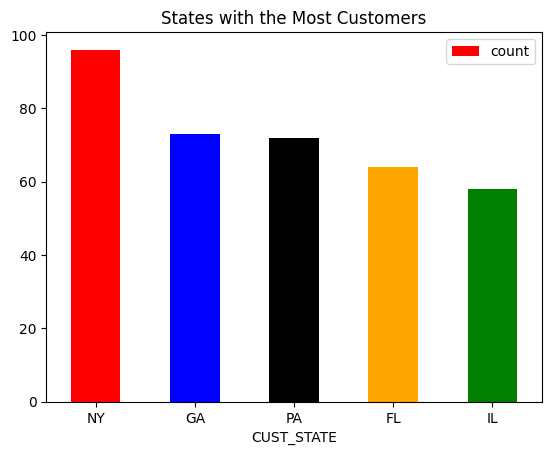

In [18]:
#Req 3.2 Find and plot which state has a high number of customers.
import pandas as pd
from pyspark.sql.functions import count

#Create a pyspark dataframe showing which states has the most customers 
custmer.groupBy("CUST_STATE").count().sort('count', ascending = False).show()

#Convert the dataframe into a pandas dataframe
states = (custmer.groupBy("CUST_STATE").count().sort('count', ascending = False)).toPandas()

#filter the dataframe to show only the top 5 values 
top5_states = states.loc[states['count'] >53] 

#Create 2 lists based on the dataframe
#states_list = top5_states['CUST_STATE'].toList()
#count_list = top5_states['count'].toList()
c = ['red', 'blue', 'black', 'orange', 'green']
states_plot = top5_states.plot.bar(x='CUST_STATE', y='count', title= 'States with the Most Customers', rot=0, color= c)

+-----------------+
|sum(total_amount)|
+-----------------+
|         53184.55|
+-----------------+



+---------+------------+
| cust_ssn|total_amount|
+---------+------------+
|123451125|     5633.07|
+---------+------------+



<Axes: title={'center': 'Customer with the Highest Transaction Amount'}, xlabel='cust_ssn'>

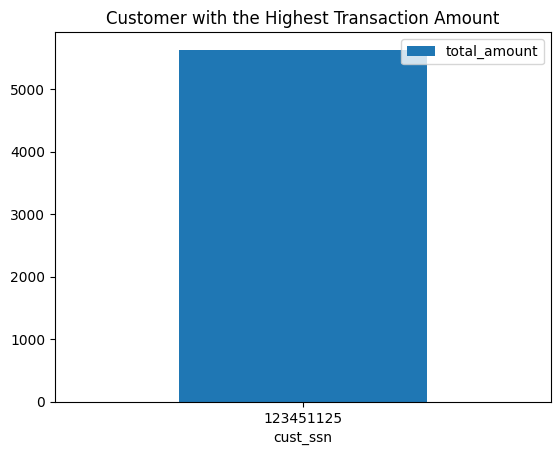

In [19]:
#Req 3.3 ) Find and plot the sum of all transactions for the top 10 customers, and which customer has the highest 
#transaction amount. hint(use CUST_SSN). 

#Used subquery to get the sum of the top 10 customers 
spark.sql("SELECT sum(total_amount) FROM (SELECT cust_ssn, ROUND(sum(transaction_value),2) as total_amount FROM credit_table GROUP BY cust_ssn ORDER by 2 desc LIMIT 10)").show()

#Which customer has the highest transaction amount
spark.sql("SELECT cust_ssn, ROUND(sum(transaction_value),2) as total_amount FROM credit_table GROUP BY cust_ssn ORDER by 2 desc LIMIT 1").show()

#Create plot, first convert to pandas 
highest_customer = spark.sql("SELECT cust_ssn, ROUND(sum(transaction_value),2) as total_amount FROM credit_table GROUP BY cust_ssn ORDER by 2 desc LIMIT 1").toPandas()
highest_customer.plot.bar(x='cust_ssn', y='total_amount', rot=0, title= "Customer with the Highest Transaction Amount")


In [20]:
list_of_states = custmer.select('CUST_STATE').distinct().rdd.map(lambda r: r[0]).collect()
list_of_states


Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/serializers.py", line 458, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 73, in dumps
    cp.dump(obj)
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 602, in dump
    return Pickler.dump(self, obj)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 692, in reducer_override
    return self._function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 565, in _function_reduce
    return self._dynamic_function_reduce(obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-pac

PicklingError: Could not serialize object: IndexError: tuple index out of range

In [22]:
# Req 4.1 Create a Python program to GET (consume) data from the above API endpoint for the loan application dataset.
import requests
import json
from pandas.io.json import json_normalize
api_url = 'https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json'
response = requests.get(api_url)
r = response.json()


In [23]:
#Req 4.2 Find the status code of the above API endpoint.
response.status_code

200

In [19]:
#Req 4.3 Once Python reads data from the API, utilize PySpark to load data into RDBMS(SQL).
#The table name should be CDW-SAPP_loan_application in the database.
import os 
db_user = os.environ.get('DB_USER')
db_password= os.environ.get('DB_PASS')

#Step 1: Convert json api into pandas dataframe
df3 = pd.DataFrame.from_dict(r)

#Step 2: Convert pandas dataframe to pysparl data to load into RDBMS(SQL)
sparkDF = spark.createDataFrame(df3)
#sparkDF.printSchema()
#sparkDF.show()

#Step 3: Load pyspark df into RDBMS 
sparkDF.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "creditcard_capstone.CDW_SAPP_loan_application") \
  .option("user", db_user) \
  .option("password", db_password) \
  .save()

c:\Users\Learner_XZHCG302\AppData\Local\Programs\Python\Python310\lib\site-packages\pyspark\sql\pandas\conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
c:\Users\Learner_XZHCG302\AppData\Local\Programs\Python\Python310\lib\site-packages\pyspark\sql\pandas\conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


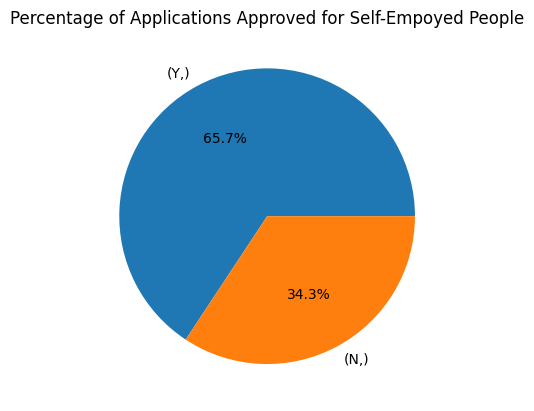

In [67]:
# Req 5.1 ) Find and plot the percentage of applications approved for self-employed applicants.

#Create temp view of loan dataframe
#sparkDF.createTempView('loan')

#Query dataframe to get get the app status for all people who are self_employed, then convert it to a pandas dataframe and store into a variable
status_self_employed = (spark.sql("SELECT Application_status FROM loan WHERE self_employed = 'Yes'")).toPandas()

#get the amount of Y and N for the app status
status_count = status_self_employed.value_counts()

#Convert the counts into percetnages using map
percentage_status = status_count.map( lambda x: x/70)

#Plot the graph of the percentage of applications approved. 
percentage_status.plot(kind= 'pie', title= 'Percentage of Applications Approved for Self-Empoyed People', autopct = '%.1f%%')
plt.show()


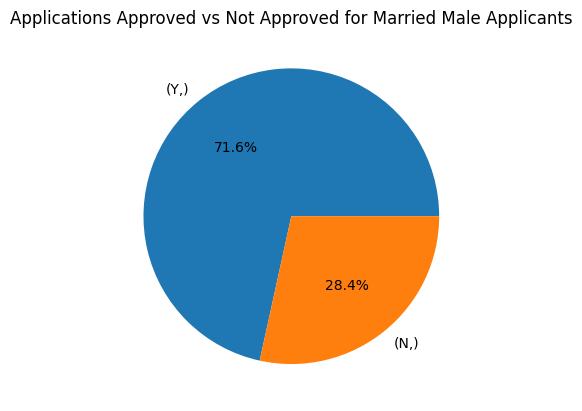

In [68]:
#Req 5.2 ) Find the percentage of rejection for married male applicants 
status_married_male = (spark.sql("Select application_status FROM loan where (Gender = 'Male' and Married = 'Yes')")).toPandas()

count_status = status_married_male.value_counts()

percentage_status_married_male = count_status.map( lambda x: x/306)
percentage_status_married_male

percentage_status_married_male.plot(kind= 'pie', title= 'Applications Approved vs Not Approved for Married Male Applicants', autopct = '%.1f%%')
plt.show()


<Axes: title={'center': 'Months with most Transactions'}, xlabel='month'>

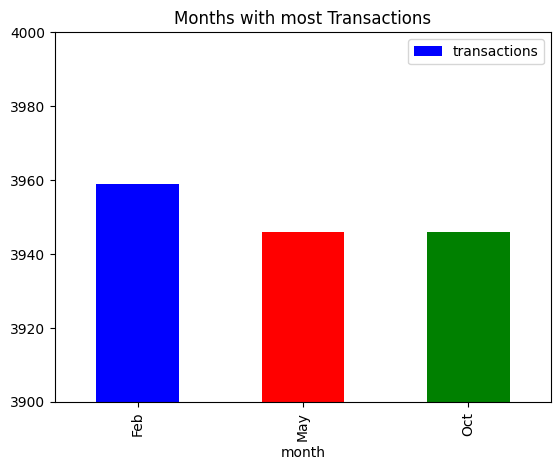

In [81]:
#5.3 Find and plot the top three months with the largest transaction data 

#Use SQL query to get the top 3 months with most transactions from credit df 
top3_months = (spark.sql("SELECT month, count(*) as transactions FROM credit_table GROUP BY month HAVING transactions > 3940 ORDER BY transactions desc")).toPandas()

top3_months.replace(2, 'Feb', inplace= True)
top3_months.replace(5, 'May', inplace= True)
top3_months.replace(10, 'Oct', inplace= True)

top3_months.plot(kind='bar', x='month', y='transactions', ylim=(3900, 4000), title= 'Months with most Transactions', color=['blue', 'red', 'green'])




<Axes: title={'center': 'Branch with Highest Healthcare Transaction Value'}, xlabel='BRANCH_CITY'>

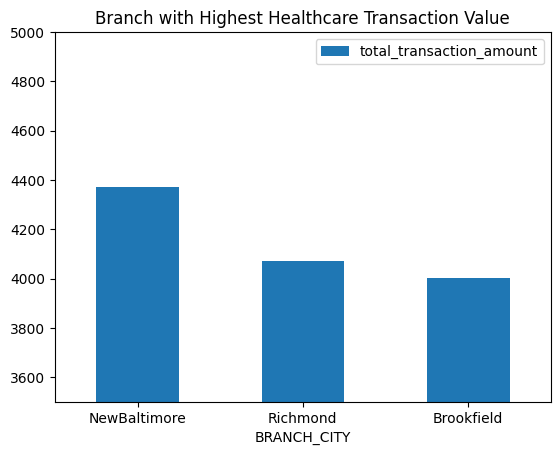

In [24]:
#Req 5.4 ) Find and plot which branch processed the highest total dollar value of healthcare transactions.

healthcare_total_amount = ((spark.sql("SELECT BRANCH_CITY, sum(transaction_value) total_transaction_amount \
FROM credit_table ct INNER JOIN branch_table bt on ct.branch_code = bt.branch_code \
WHERE transaction_type = 'Healthcare' GROUP BY BRANCH_CITY HAVING total_transaction_amount > 4000 ORDER BY 2 desc "))).toPandas()

healthcare_total_amount.plot(kind = 'bar', x='BRANCH_CITY', y='total_transaction_amount', title= 'Branch with Highest Healthcare Transaction Value', ylim=(3500, 5000), rot=0)